# Importing Libraries and dataset

In [1]:
# Importing dataset and libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import matplotlib.cm as cm
import seaborn as sns
from package import utilities as ut
from itertools import chain
import os

C:\Users\Enrico\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Importing the dataset
G = nx.read_edgelist('combined/facebook_combined.txt', create_using=nx.Graph(),nodetype= int)


In [3]:
nx.info(G)

'Graph with 4039 nodes and 88234 edges'

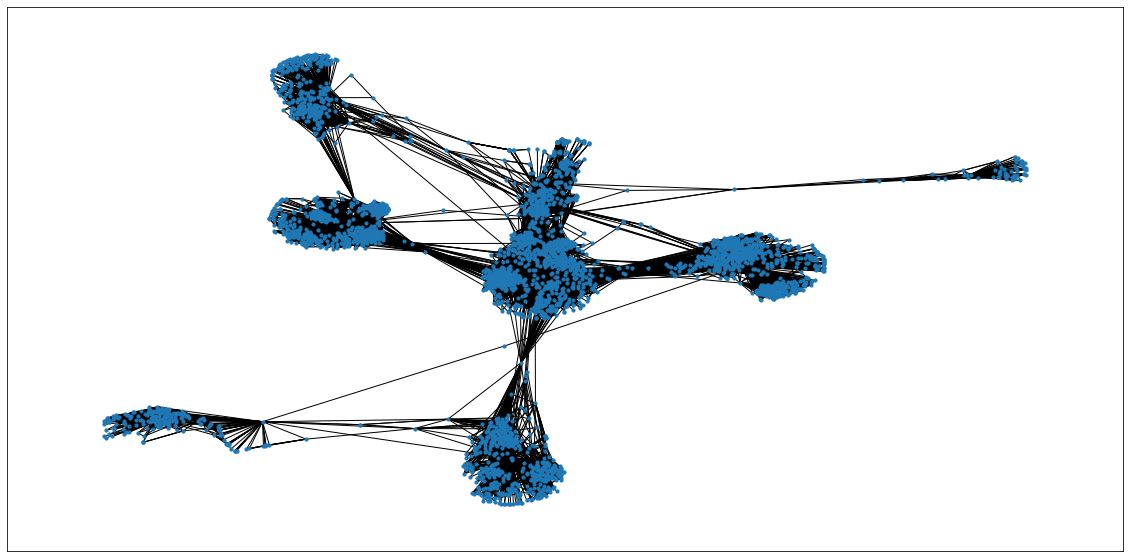

In [4]:
# Plotting the entire graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20,10))
nx.draw_networkx(G, pos= pos,with_labels= False,node_size=10)

In [5]:
#Label dictionary
labeldict = {}
labeldict[348] = "Node 348"
labeldict[414] = "Node 414"
labeldict[0] = "Node 0"
labeldict[107] = "Node 107"
labeldict[3980] = "Node 3980"
labeldict[3437] = "Node 3437"
labeldict[686] = "Node 686"
labeldict[1684] = "Node 1684"
labeldict[1912] = "Node 1912"
labeldict[698] = "Node 698"

0 is in community number 0
107 is in community number 3
3980 is in community number 14
3437 is in community number 10
686 is in community number 15
1684 is in community number 2
1912 is in community number 4
698 is in community number 15
348 is in community number 1
414 is in community number 1


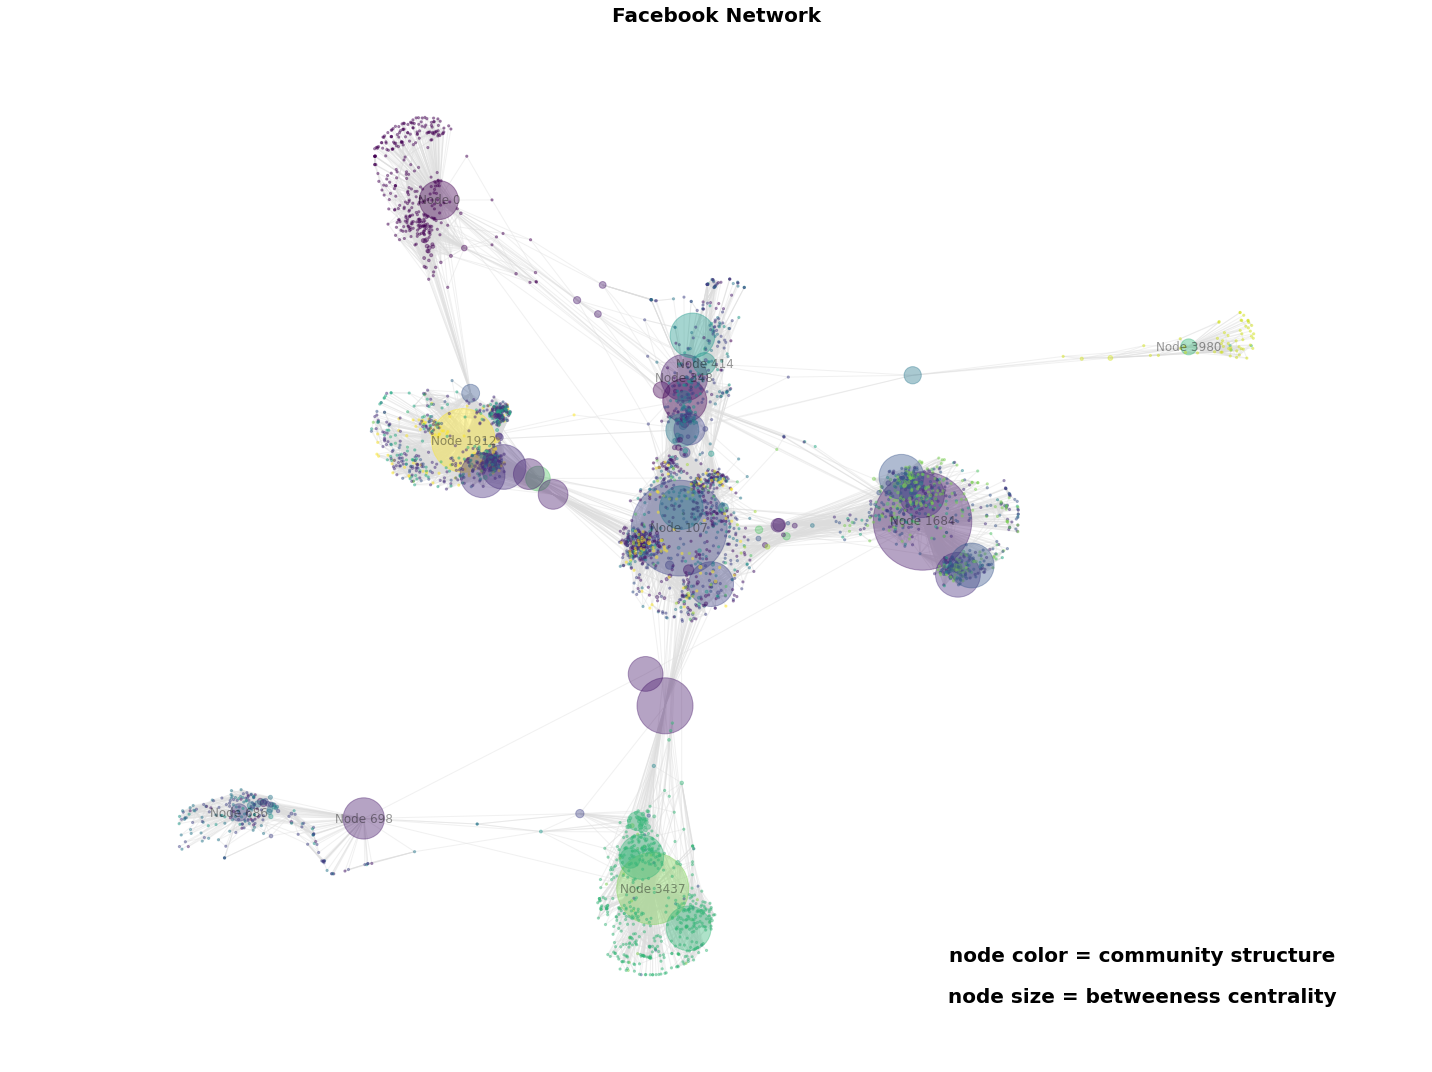

In [6]:
# Plot facebook network using betweenness as metric for the node size and communities indicated by the diverse colors
# Compute betweenness centrality
centrality = nx.betweenness_centrality(G, k = 10, endpoints = True)

# Compute communities
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

# Draw the graph
fig, ax = plt.subplots(figsize = (20, 15))
node_color = [values[n] for n in G]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    labels=labeldict,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Facebook Network", font)
# Change font color for legend
font["color"] = "black"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Network communities
ego_nodes = set([int(name.split('.')[0]) for name in os.listdir("data/")])

for node in ego_nodes:
    print(node, "is in community number", parts.get(node))
n_sizes = [5]*len(G.nodes())
for node in ego_nodes:
    n_sizes[node] = 250


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
#plt.show()
plt.savefig("Facebook network.png")

# Network Statistics

Statistics regarding structure of the network (is it connected?, is it bipartite?, etc).

In [7]:
# Summary of the graph
info = nx.info(G)
print(info)
# True if the graph is connected, false otherwise.
connected = nx.is_connected(G)
print("Network is connected?",connected)
# Returns True if graph G is bipartite, False if not.
bipartite = nx.is_bipartite(G)
print("Network is bipartite?",bipartite)
# Returns the value of the density
density = nx.density(G)
print("Network's density:",density)

Graph with 4039 nodes and 88234 edges
Network is connected? True
Network is bipartite? False
Network's density: 0.010819963503439287


In [8]:
# Computation of average clustering
avg_clustering = nx.average_clustering(G)
print("Network Average Clustering: ", avg_clustering)
# Calculates average distance
avg_distance = nx.average_shortest_path_length(G)
print("Network Average distance: ", avg_distance)
# Calculates diameter
diameter = nx.diameter(G, e=None, usebounds=False)
print("Network Diameter: ", diameter)

Network Average Clustering:  0.6055467186200876
Network Average distance:  3.6925068496963913
Network Diameter:  8


In [9]:
# Computes degree centrality and most influential nodes
centrality = nx.degree_centrality(G)
print(" ")
print("----------Degree centrality----------")
print(" ")
for w in sorted(centrality, key=centrality.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality[w])
# PageRank centrality and most influential nodes
centrality_page_rank = nx.pagerank(G)
print(" ")
print("----------PageRank centrality----------")
print(" ")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])

 
----------Degree centrality----------
 
Most influent node:  107  Degree of:  0.258791480931154
Most influent node:  1684  Degree of:  0.1961367013372957
Most influent node:  1912  Degree of:  0.18697374938088163
Most influent node:  3437  Degree of:  0.13546310054482416
Most influent node:  0  Degree of:  0.08593363051015354
Most influent node:  2543  Degree of:  0.07280832095096582
Most influent node:  2347  Degree of:  0.07206537890044576
Most influent node:  1888  Degree of:  0.0629024269440317
Most influent node:  1800  Degree of:  0.06067360079247152
Most influent node:  1663  Degree of:  0.058197127290737984
 
----------PageRank centrality----------
 
Most influent node:  3437  Degree of:  0.0076145868447496
Most influent node:  107  Degree of:  0.006936420955866117
Most influent node:  1684  Degree of:  0.006367162138306824
Most influent node:  0  Degree of:  0.006289602618466542
Most influent node:  1912  Degree of:  0.003876971600884498
Most influent node:  348  Degree of: 

# Random graph and Real Network

Random graphs usually follow a normal distribution instead real networks have a power-law structure (connected to scale-free property). We use it to extract useful features from the real networks and study properties in controlled environment.

In [10]:
# Generate a random graph with 4039 nodes and a probability od 0.01 per edges
G_random = nx.gnp_random_graph(4039, 0.01, seed=42)
# summary of random graph
info_random = nx.info(G_random)
print(info_random)

Graph with 4039 nodes and 80990 edges


### Random Graph

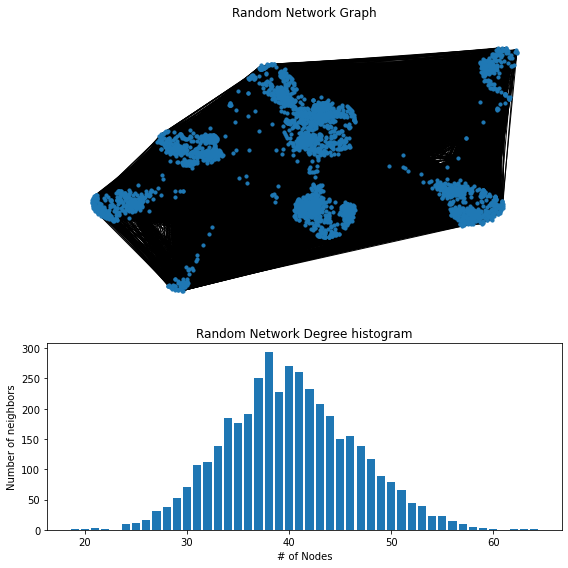

In [11]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G)
nx.draw_networkx(G_random, pos= pos,with_labels= False, node_size=10)
# Set title
ax0.set_title("Random Network Graph")
# Do not plot axis on graph
ax0.set_axis_off()
# Second plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
# Create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G_random.degree()), reverse=True)
# Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Random Network Degree histogram")
ax1.set_xlabel("# of Nodes")
ax1.set_ylabel("Number of neighbors")
fig.tight_layout()
#plt.show()
plt.savefig("Random Graph.png")

### Real Network

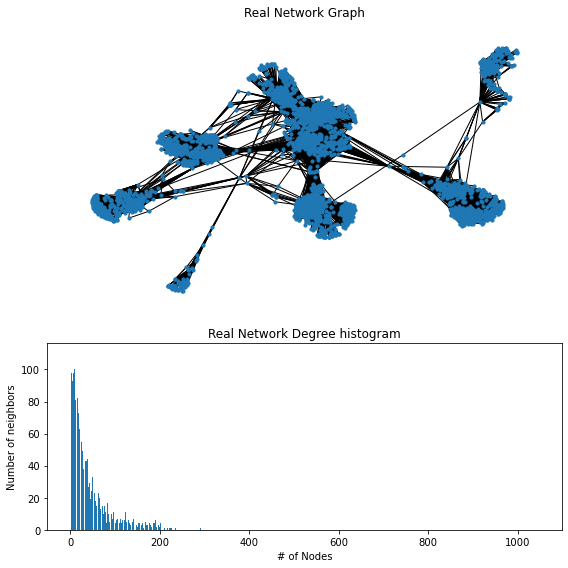

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot
ax0 = fig.add_subplot(axgrid[0:3, :])
nx.draw_networkx(G, pos= pos,with_labels= False, node_size=10)
# Set title
ax0.set_title("Real Network Graph")
# Do not plot axis on graph
ax0.set_axis_off()
# Second plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
# Create a list with the degree of random graph and sort
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
# Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Real Network Degree histogram")
ax1.set_xlabel("# of Nodes")
ax1.set_ylabel("Number of neighbors")
fig.tight_layout()
plt.show()
plt.savefig("Real FB Network.png")

# Communities

Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices (best_partition).

In [13]:
# Compute the partition, the total number of communities is equal to 16
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
df_communities = pd.DataFrame(partition, index=[0]).T.reset_index()
df_communities.columns = ["nodes", "communities"]
print("How Many communities are there? ", len(set(values)))

How Many communities are there?  16


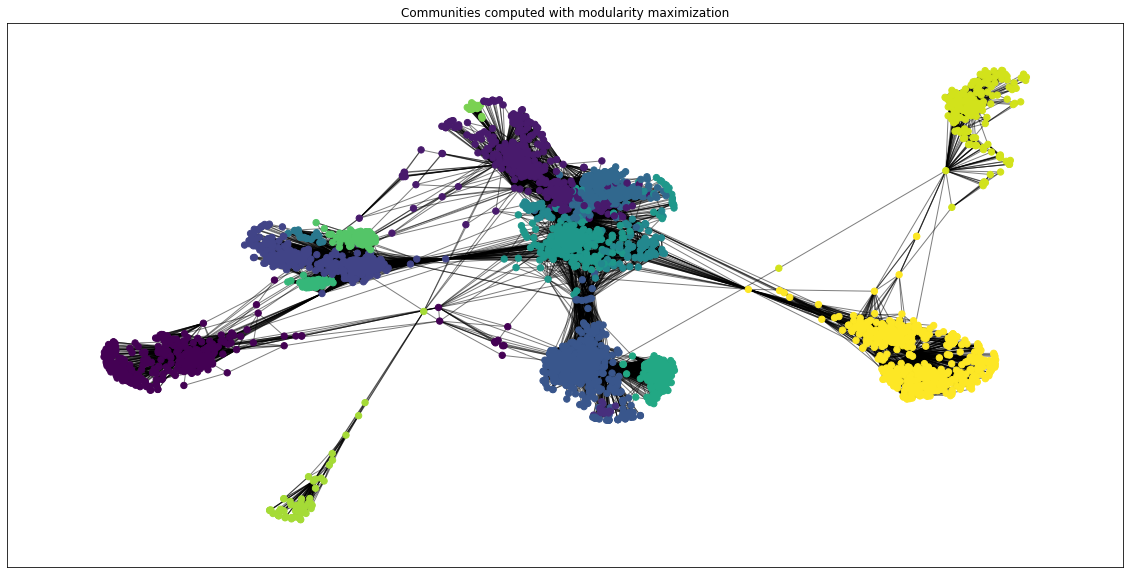

In [14]:
# Plot the communities by maximizing modularity
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities computed with modularity maximization")
#plt.show()
plt.savefig("Communities.png")

In [15]:
# Summary of nodes in each community created
df_communities_statistics = df_communities.groupby("communities").count().sort_values("nodes", ascending=False).reset_index()
sorted_communities = list(df_communities_statistics.communities)
df_communities_statistics["communities"] = ["Community " + str(df_communities_statistics["communities"][x]) for x in range(len(df_communities_statistics))]
df_communities_statistics

communities  nodes
0   Community 15    548
1    Community 4    535
2    Community 8    435
3    Community 1    432
4    Community 3    423
5    Community 0    350
6    Community 5    323
7   Community 11    237
8    Community 9    226
9   Community 14    206
10   Community 7    128
11  Community 10     73
12  Community 13     60
13  Community 12     25
14   Community 2     19
15   Community 6     19

Text(0.5, 1.0, 'Number of nodes per communities')

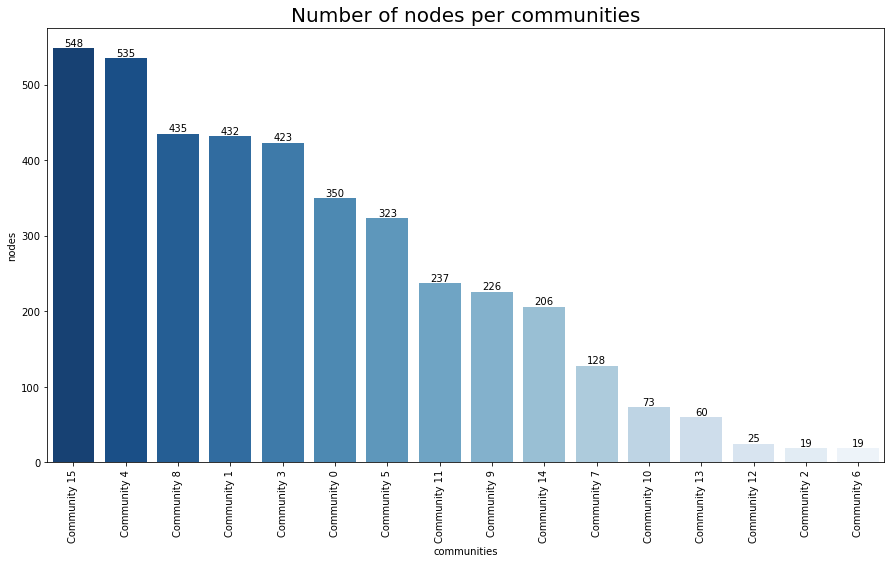

In [16]:
# Define the plot
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "communities", y = "nodes", data = df_communities_statistics, palette= "Blues_r")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Number of nodes per communities", fontsize = 20)

# Analysis

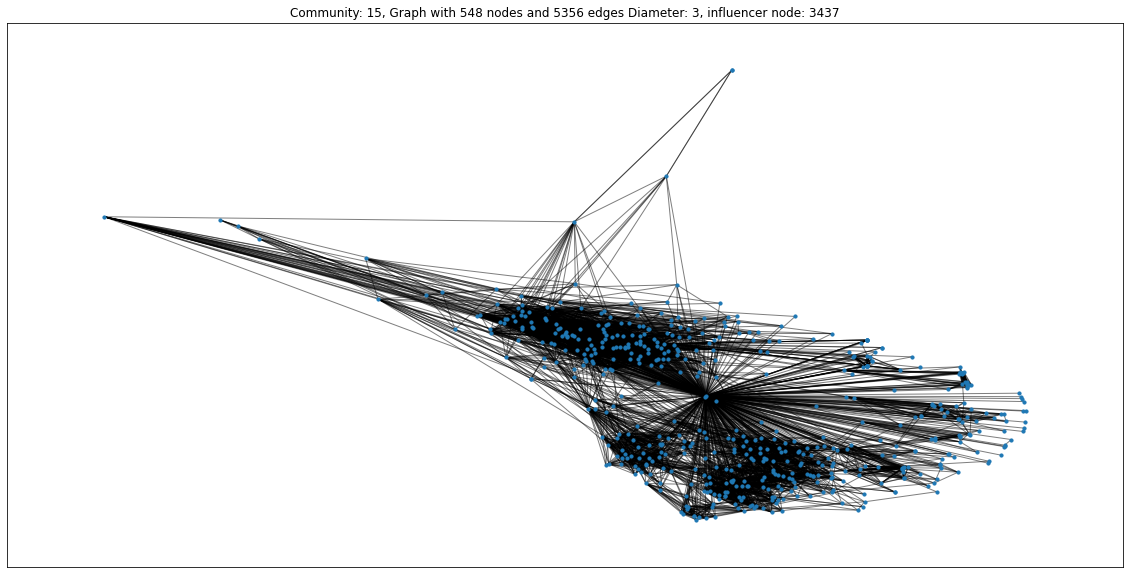

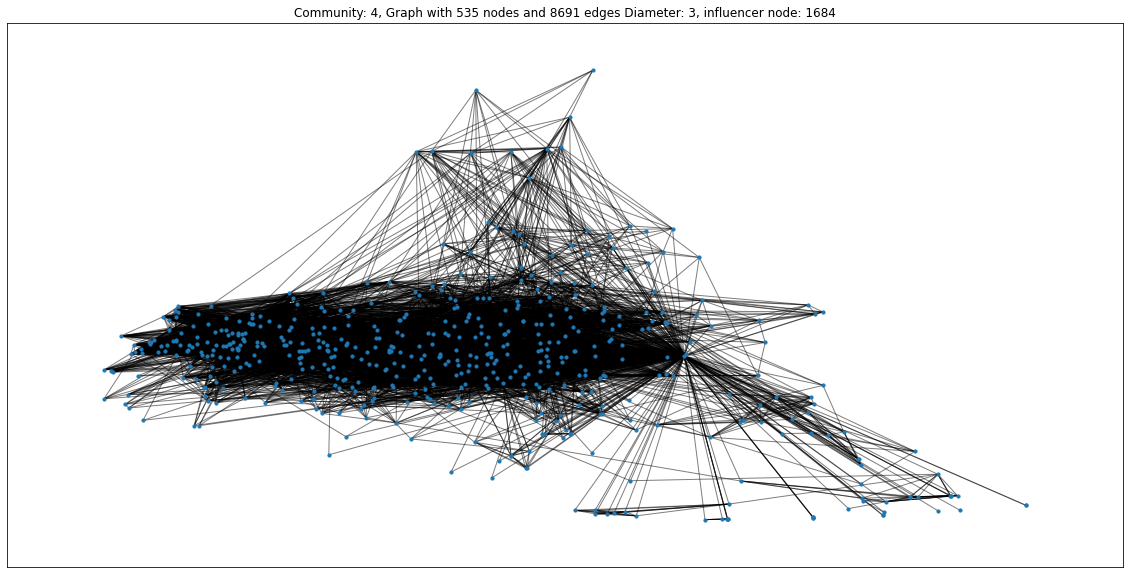

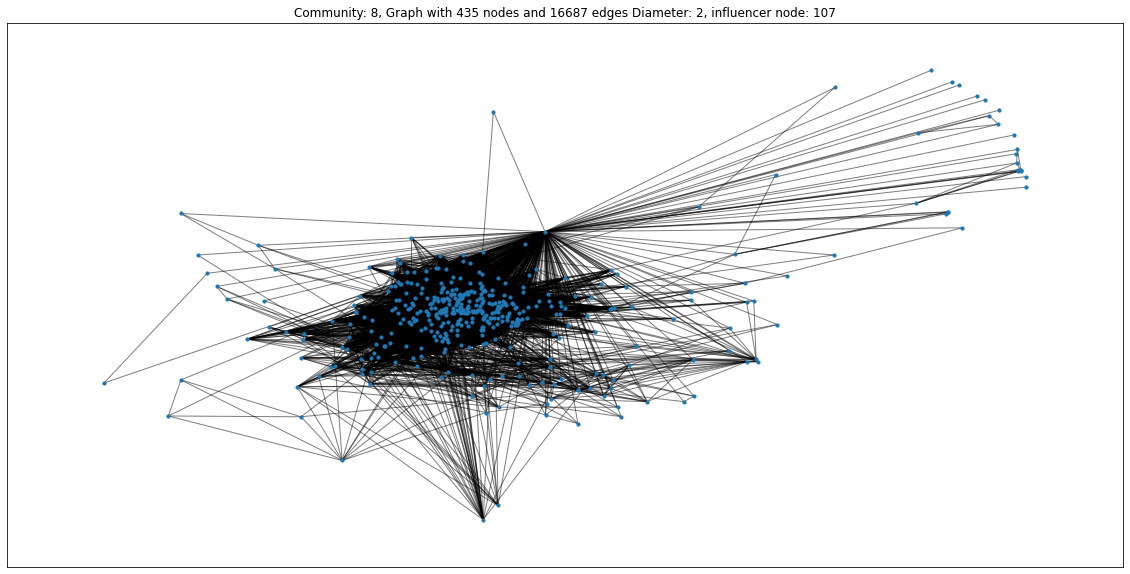

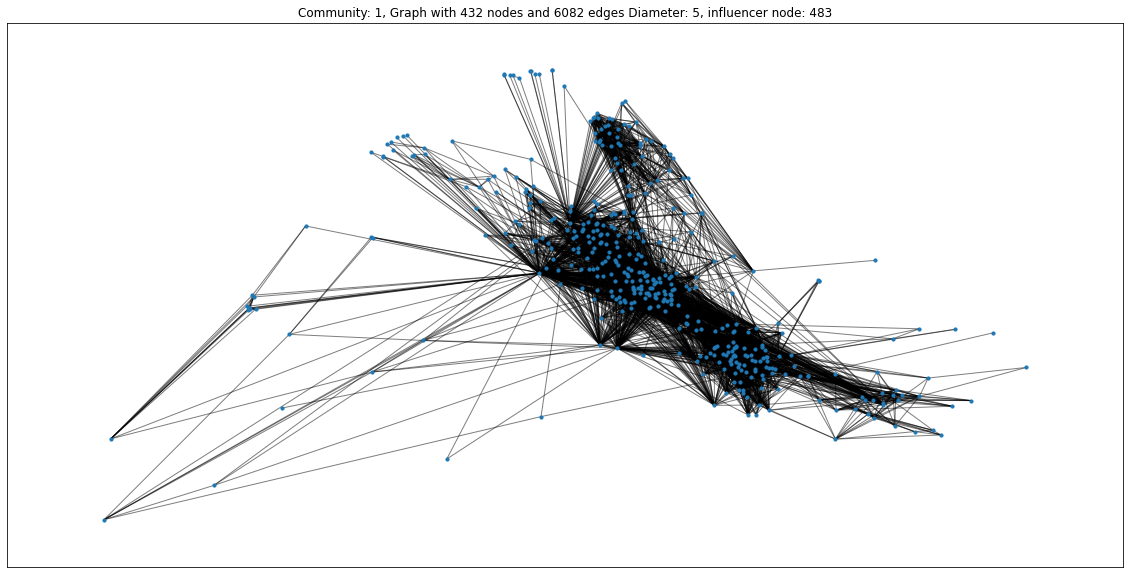

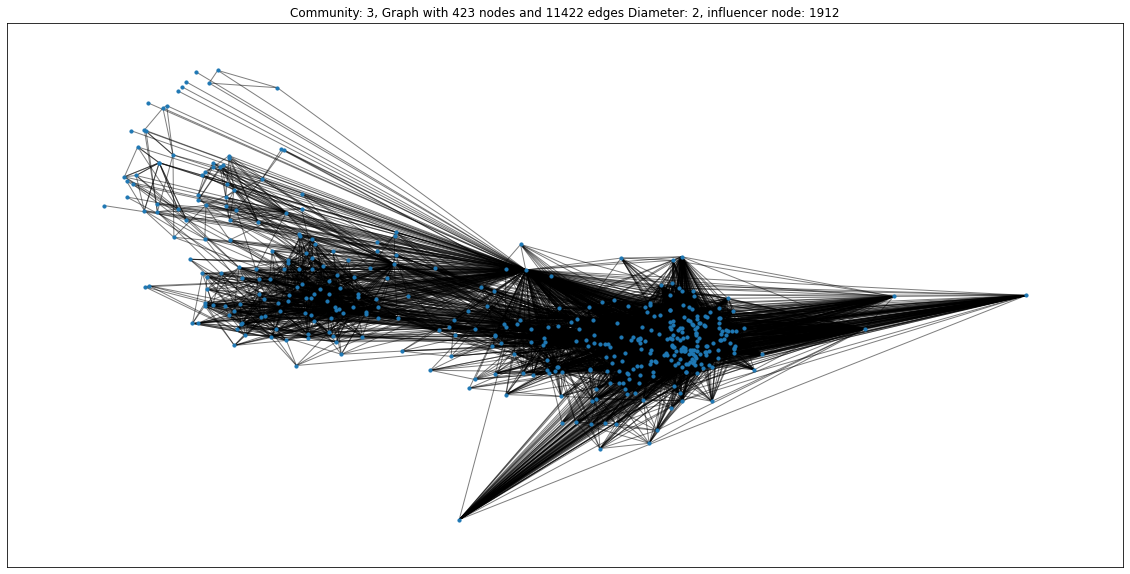

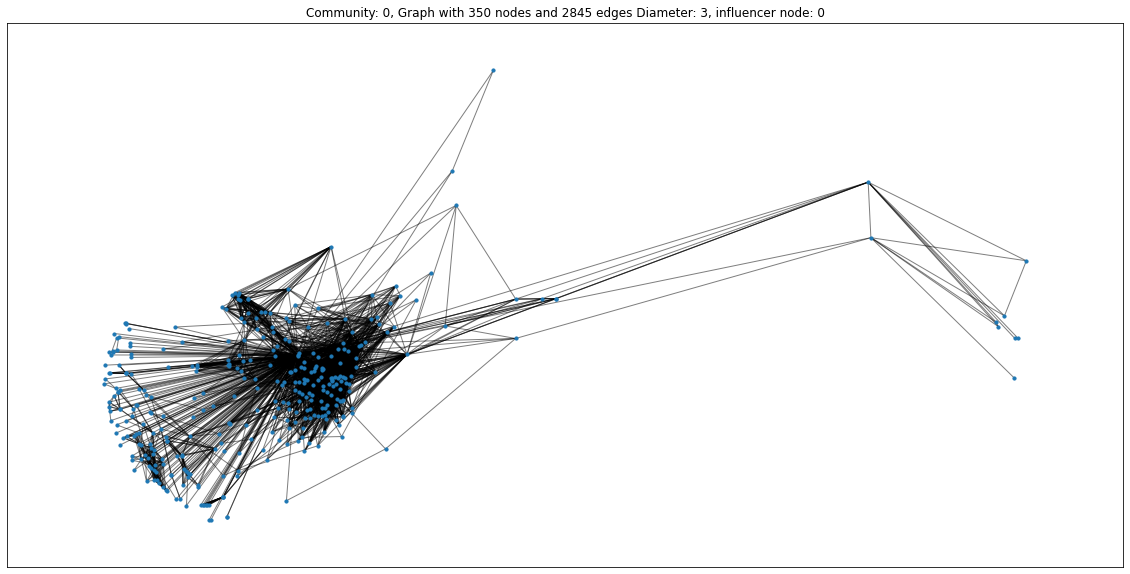

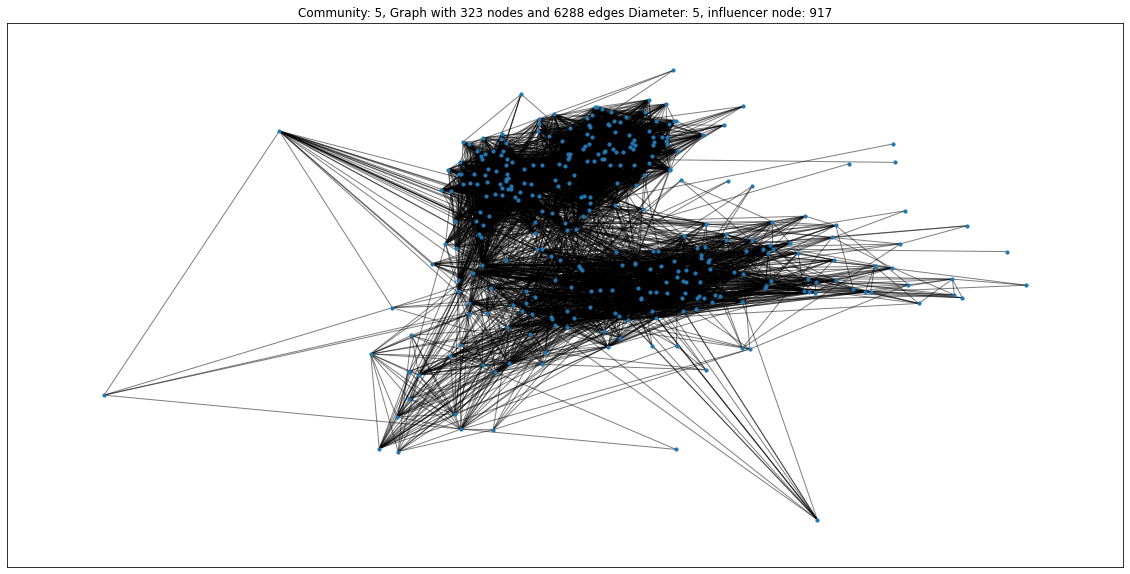

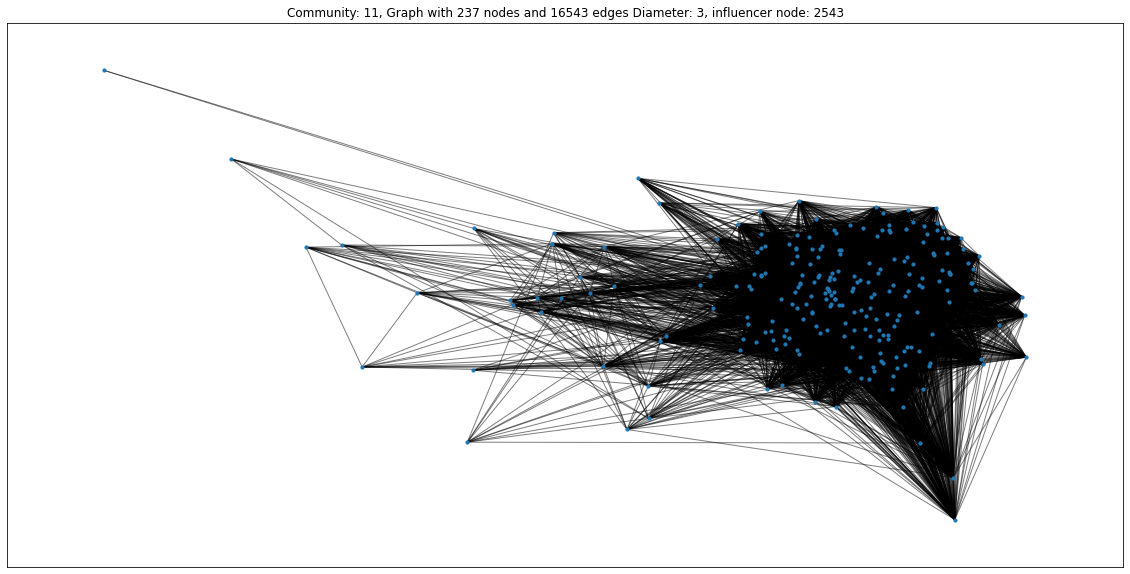

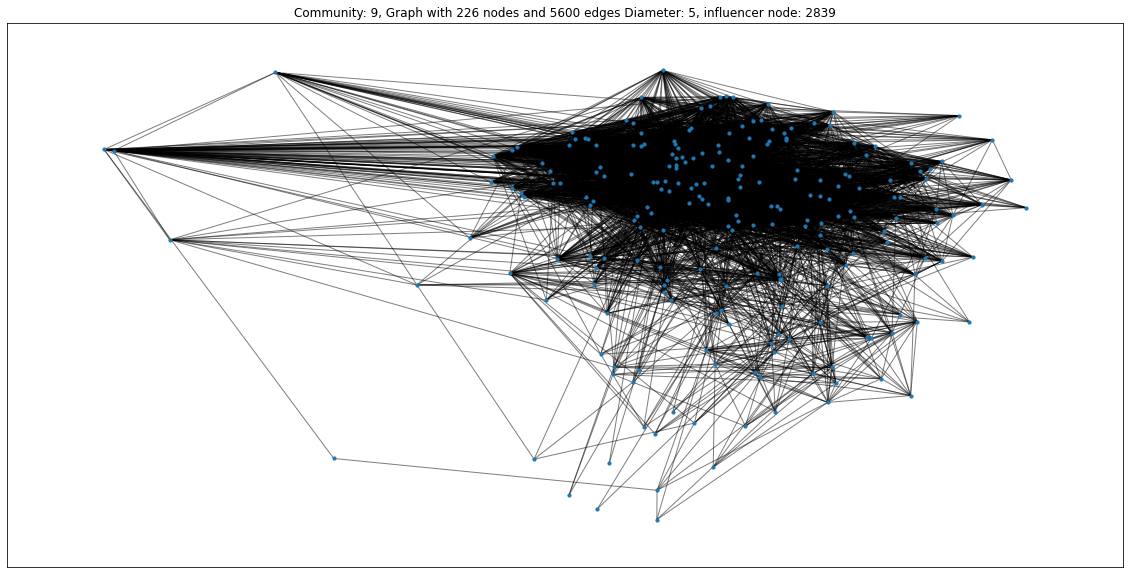

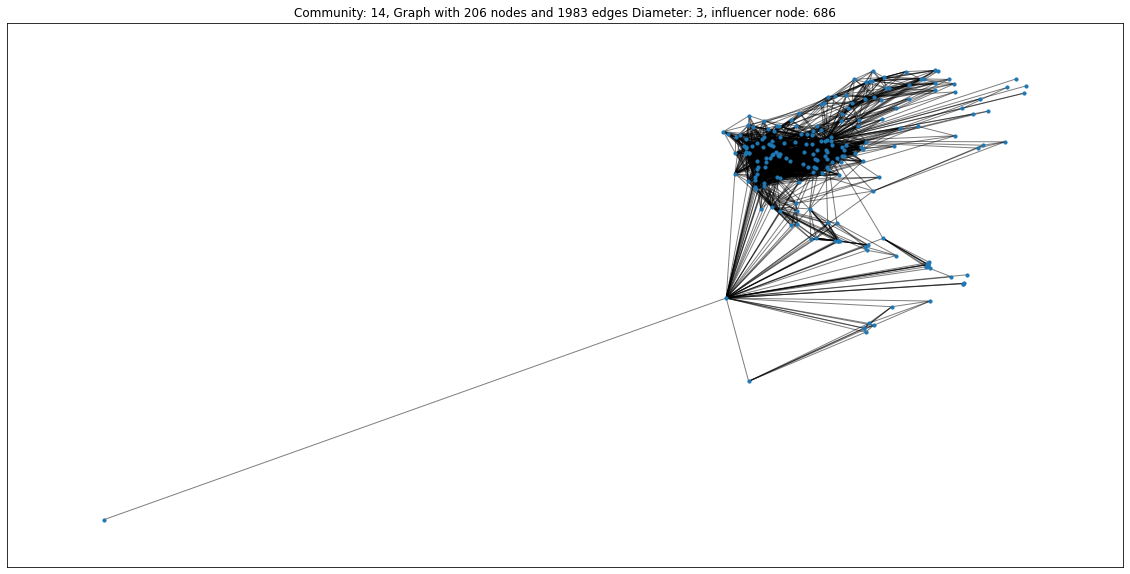

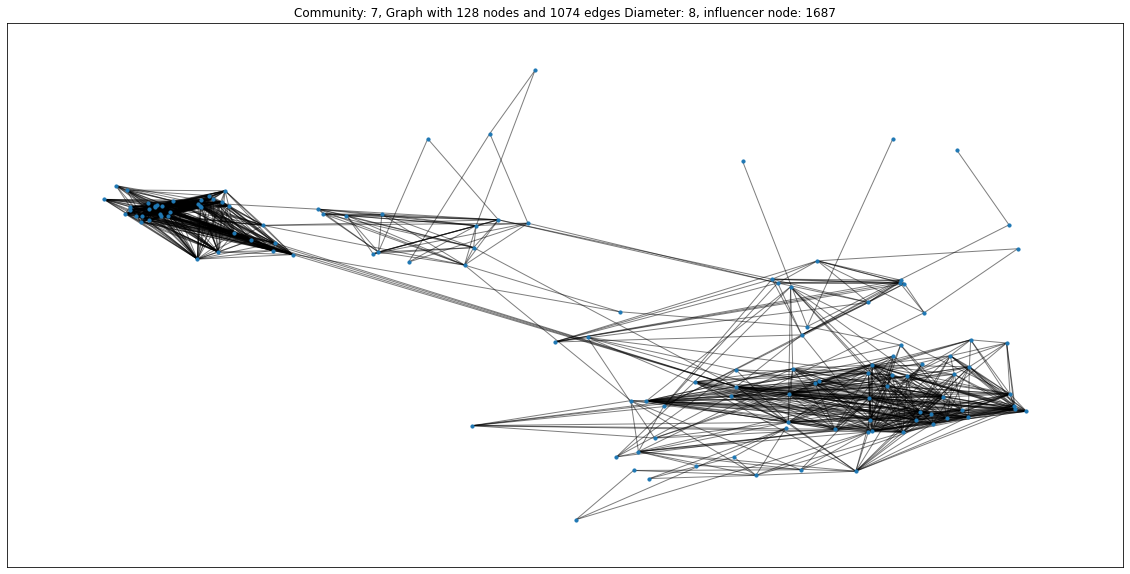

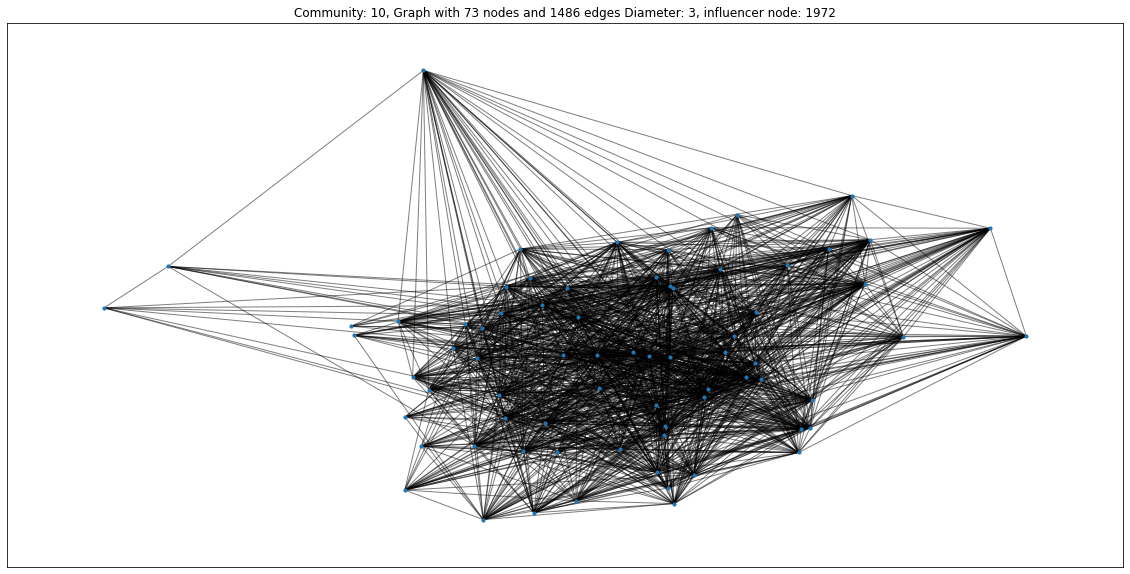

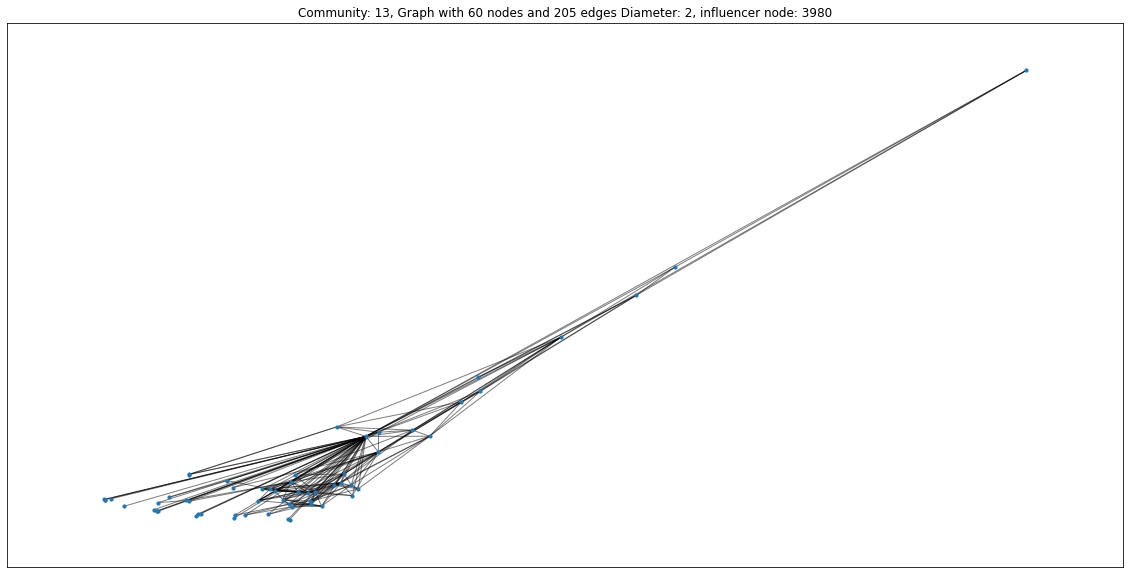

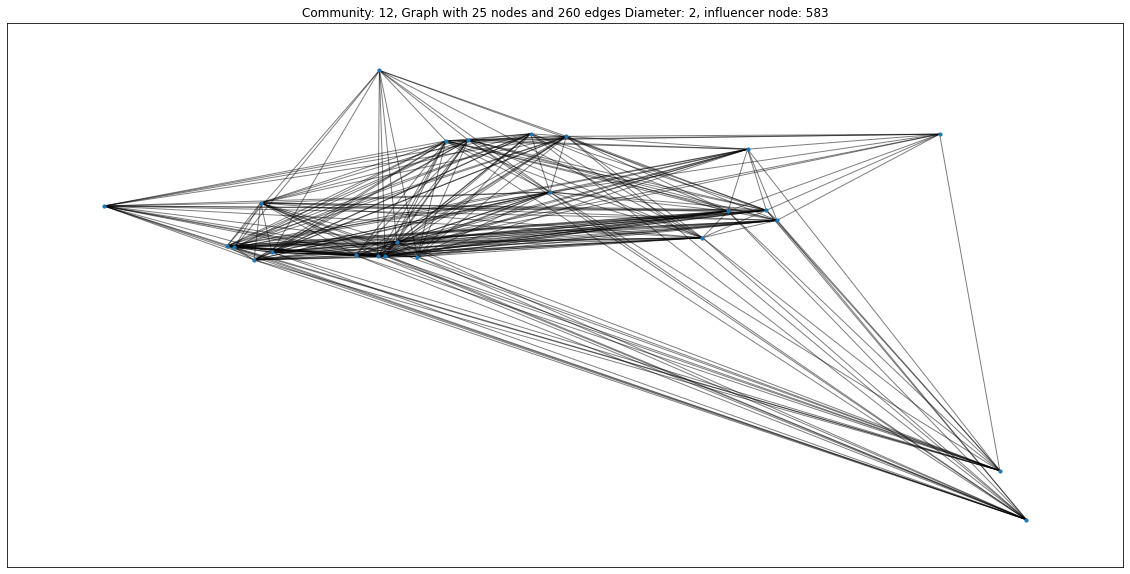

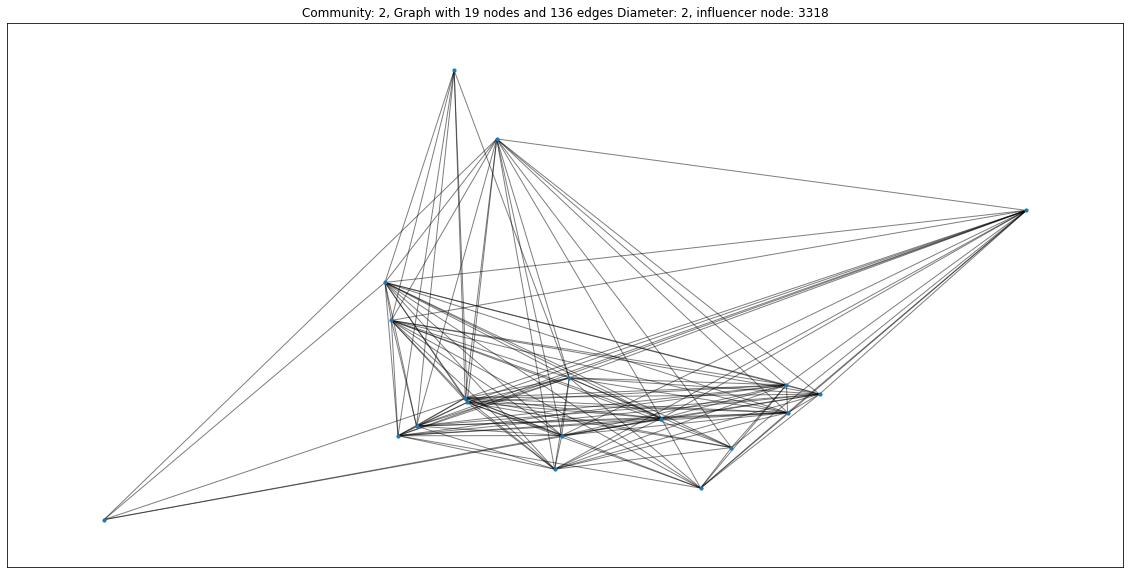

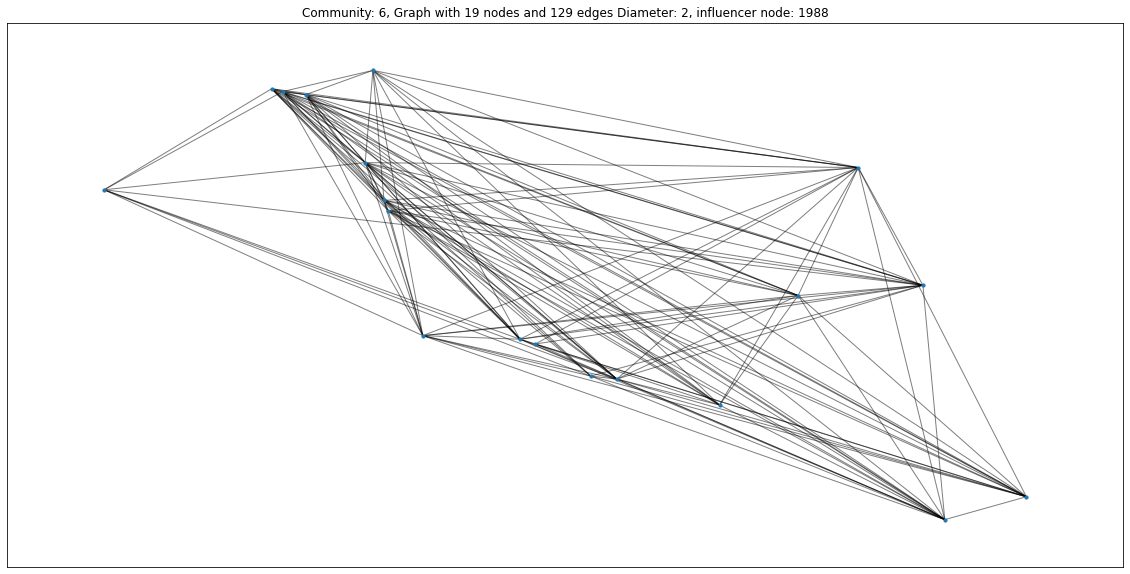

In [17]:
# Brief overview over all of the communities statistics
comm_info = []
comm_avg_distance = []
comm_diameter = []
comm_density = []
comm_influencer = []

for x in sorted_communities:
    nodes = list(df_communities[df_communities["communities"]==x]["nodes"])
    community = G.subgraph(nodes)
    info = nx.info(community)
    comm_info += [info]
    avg_distance = nx.average_shortest_path_length(community)
    comm_avg_distance += [avg_distance]
    diameter = nx.diameter(community, e=None, usebounds=False)
    comm_diameter += [diameter]
    influencer = sorted(nx.degree_centrality(community), key=centrality.get, reverse=True)[0]
    comm_influencer += [influencer]
    density = nx.density(community)
    comm_density += [density]
    plt.figure(figsize=(20,10))
    plt.title("Community: "+str(x)+", "+str(info) + " Diameter: " + str(diameter) + ", influencer node: " + str(influencer))
    nx.draw_networkx_nodes(community, pos, node_size=10)
    nx.draw_networkx_edges(community, pos, alpha=0.5)
    plt.show()

df_communities_statistics["comm_info"] = comm_info
df_communities_statistics["comm_avg_distance"] = comm_avg_distance
df_communities_statistics["comm_diameter"] = comm_diameter
df_communities_statistics["comm_density"] = comm_density
df_communities_statistics["comm_influencer"] = comm_influencer

In [18]:
# Print all of the statistics
df_communities_statistics

communities  nodes                             comm_info  \
0   Community 15    548   Graph with 548 nodes and 5356 edges   
1    Community 4    535   Graph with 535 nodes and 8691 edges   
2    Community 8    435  Graph with 435 nodes and 16687 edges   
3    Community 1    432   Graph with 432 nodes and 6082 edges   
4    Community 3    423  Graph with 423 nodes and 11422 edges   
5    Community 0    350   Graph with 350 nodes and 2845 edges   
6    Community 5    323   Graph with 323 nodes and 6288 edges   
7   Community 11    237  Graph with 237 nodes and 16543 edges   
8    Community 9    226   Graph with 226 nodes and 5600 edges   
9   Community 14    206   Graph with 206 nodes and 1983 edges   
10   Community 7    128   Graph with 128 nodes and 1074 edges   
11  Community 10     73    Graph with 73 nodes and 1486 edges   
12  Community 13     60     Graph with 60 nodes and 205 edges   
13  Community 12     25     Graph with 25 nodes and 260 edges   
14   Community 2     19     Graph with 19 nodes and 136 edges   
15   Community 6     19     Graph with 19 nodes and 129 edges   

    comm_avg_distance  comm_diameter  comm_density  comm_influencer  
0            1.971243              3      0.035736             3437  
1            1.942518              3      0.060842             1684  
2            1.823222              2      0.176778              107  
3            2.449815              5      0.065330              483  
4            1.872027              2      0.127973             1912  
5            1.991846              3      0.046582                0  
6            2.295041              5      0.120916              917  
7            1.413073              3      0.591540             2543  
8            1.928968              5      0.220256             2839  
9            2.129718              3      0.093914              686  
10           3.032849              8      0.132136             1687  
11           1.435693              3      0.565449             1972  
12           1.884181              2      0.115819             3980  
13           1.133333              2      0.866667              583  
14           1.204678              2      0.795322             3318  
15           1.245614              2      0.754386             1988

# Information virality in networks

How does information spread in networks? Nowadays misinformation is one of the most important negative externalities of social networks. In order to clearly explain the reasoning method behind this research some assumptions must be made: 
1. since the network was unweighted it was assigned a weight to each edge obtained by the average between source node's one centrality and node's two one.
2. the information spread in this case will be defined as "secret".
3. it is assumed that at the beginning of the infection process or information flow, only two people know the secret.
4. the spread of information has three main characters in this analysis: two people that know the secret (red nodes in the graphs and one which will be the first person "infected" by the secret (yellow). All the remaining blue nodes will never know the secret

# Information spreading (community number 13)

In [19]:
# Take community 12 as example of information spreading process because it is the community with the highest density
nodes = list(df_communities[df_communities["communities"]==13]["nodes"])


In [20]:
# Assign a weight to each edge obtained by the average between source node's one centrality and node's two one.
df = pd.read_csv('combined/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
df = pd.read_csv('combined/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality, index=[0]).T.reset_index()
centrality.columns = ["node1","centrality"]
df_centrality = pd.merge(df, centrality, on="node1")
df_centrality.columns = ["node1","node2","node1_centrality"]
centrality.columns = ["node2","centrality"]
df_centrality = pd.merge(df_centrality, centrality, on="node2")
df_centrality.columns = ["node1","node2","node1_centrality","node2_centrality"]
df_centrality["weight"] = ((df_centrality["node1_centrality"]+df_centrality["node2_centrality"])/2)*10000
df_centrality = df_centrality.drop(columns=["node1_centrality","node2_centrality"])
df_centrality = df_centrality[df_centrality["node1"].isin(nodes)].reset_index(drop=True)
df_centrality.sort_values("weight", ascending=False)

node1  node2     weight
164   3980   4030  96.582467
129   3980   4023  95.344230
18    3980   3982  90.391283
48    3980   3998  90.391283
89    3980   4014  87.914809
..     ...    ...        ...
71    3999   4005   8.667657
192   3999   4036   7.429421
161   3996   4028   7.429421
85    3987   4012   4.952947
163   4001   4029   4.952947

[206 rows x 3 columns]

In [21]:
# Create a graph from the new dataset containing weight
G_inf = nx.from_pandas_edgelist(
    df_centrality,
    source="node1",
    target="node2",
    edge_attr="weight",
    create_using=nx.Graph())

In [22]:
# Info on graph
nx.info(G_inf)

'Graph with 61 nodes and 206 edges'

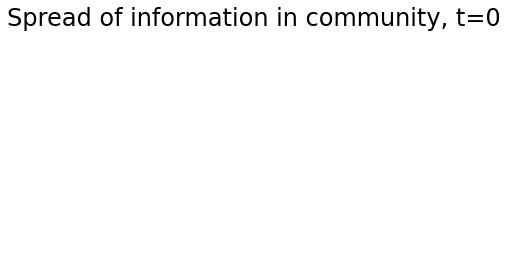

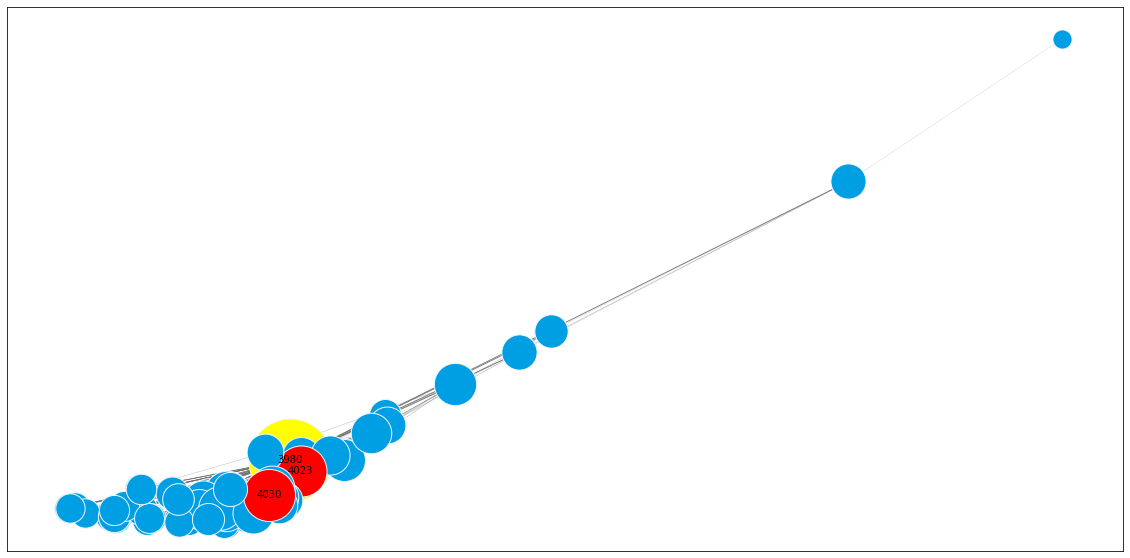

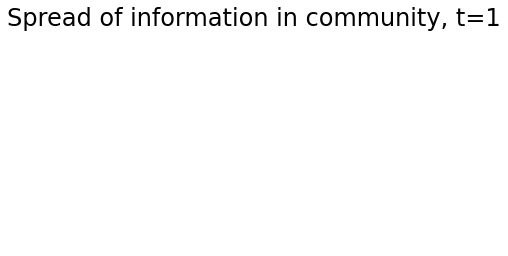

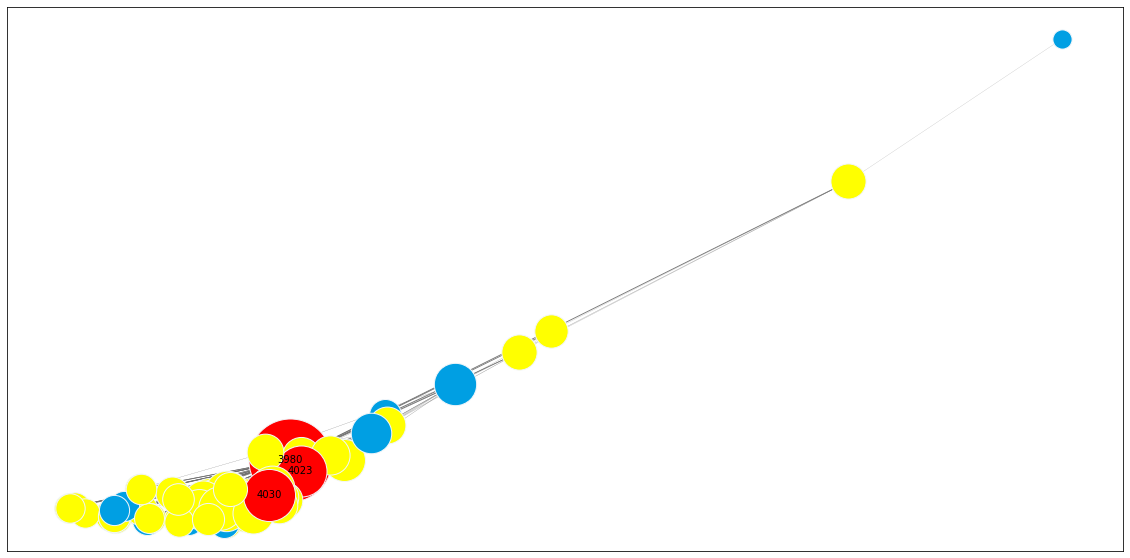

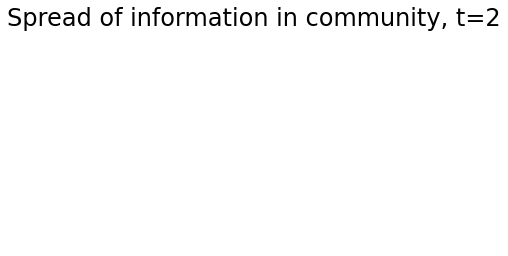

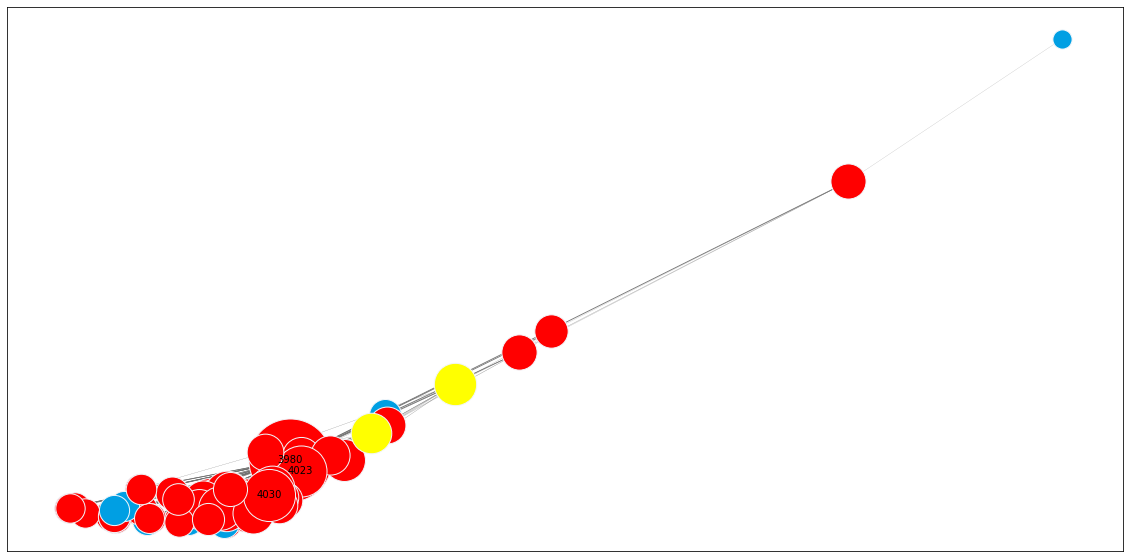

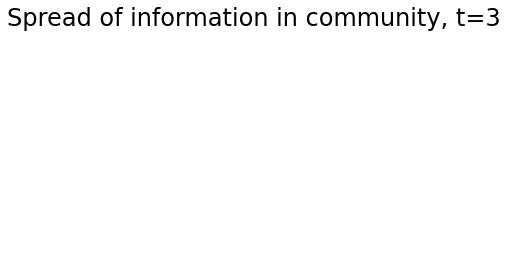

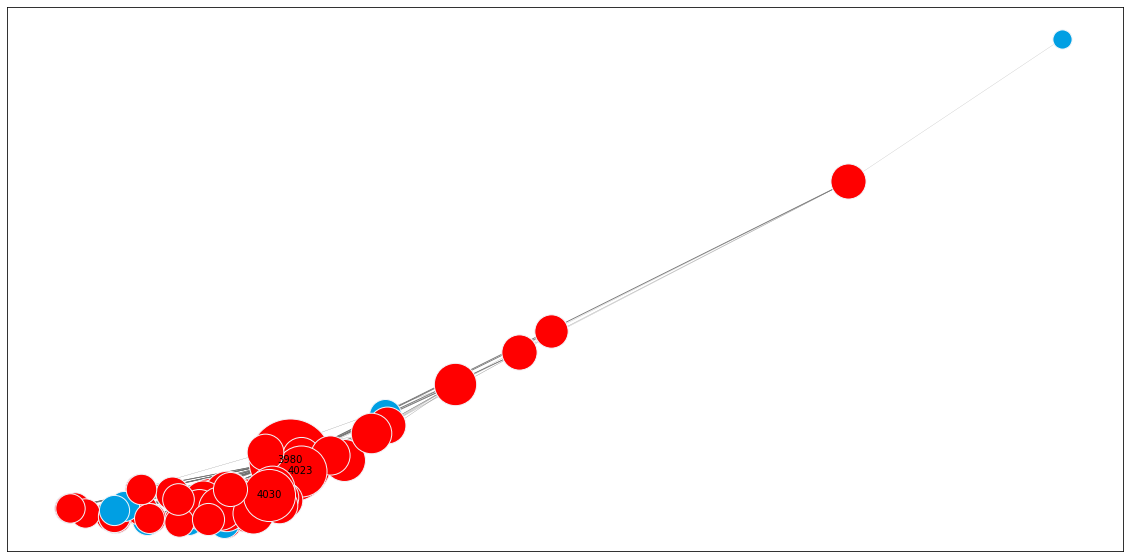

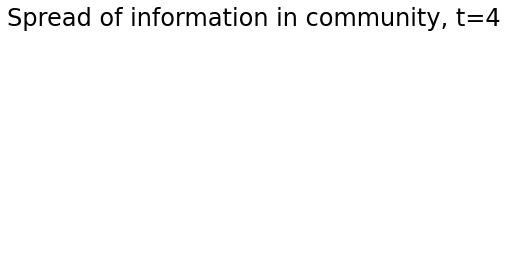

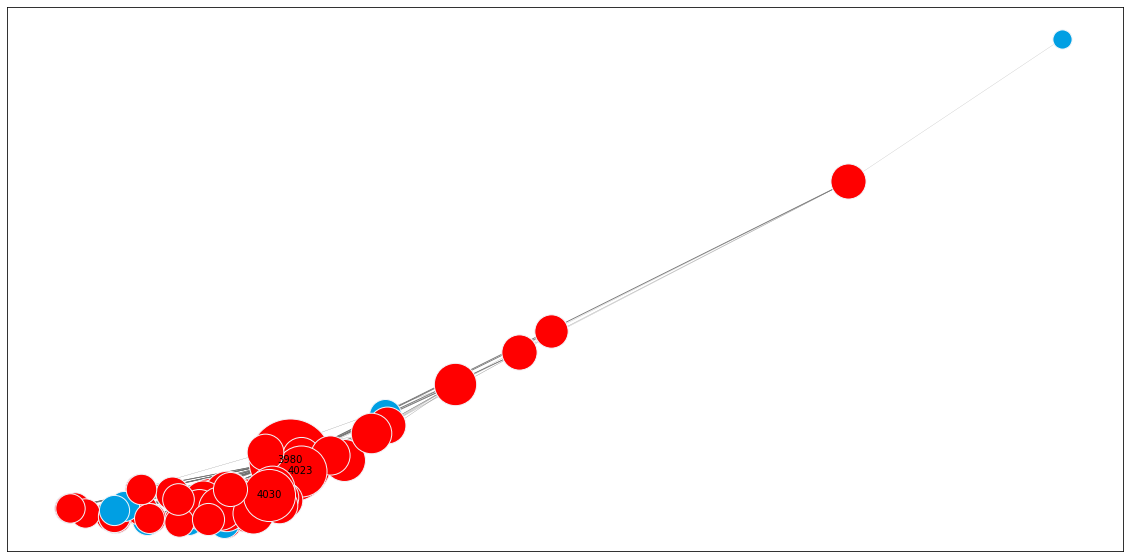

In [23]:
# Initializing and plotting infection times
infection_times = {4023:-1,4030:-1,3980:0}
label = {4023:"4023",4030:"4030",3980:"3980"}

for t in range(5):
    ut.plot_G(G_inf,pos,infection_times,t, label)
    ut.infection_times = ut.independent_cascade(G_inf,t,infection_times)

# Information spreading in community 15

In [24]:
# Take community 12 as example of information spreading process because it is the community with the highest density
nodes_ = list(df_communities[df_communities["communities"]==15]["nodes"])

In [25]:
# Assign a weight to each edge obtained by the average between source node's one centrality and node's two one.
df = pd.read_csv('combined/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
df = pd.read_csv('combined/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality, index=[0]).T.reset_index()
centrality.columns = ["node1","centrality"]
df_centrality = pd.merge(df, centrality, on="node1")
df_centrality.columns = ["node1","node2","node1_centrality"]
centrality.columns = ["node2","centrality"]
df_centrality = pd.merge(df_centrality, centrality, on="node2")
df_centrality.columns = ["node1","node2","node1_centrality","node2_centrality"]
df_centrality["weight"] = ((df_centrality["node1_centrality"]+df_centrality["node2_centrality"])/2)*10000
df_centrality = df_centrality.drop(columns=["node1_centrality","node2_centrality"])
df_centrality = df_centrality[df_centrality["node1"].isin(nodes_)].reset_index(drop=True)
df_centrality.sort_values("weight", ascending=False)

node1  node2      weight
531    3437   3830  811.045072
1316   3437   3596  783.803863
1065   3437   3545  780.089153
4785   3437   3938  780.089153
1384   3437   3604  771.421496
...     ...    ...         ...
4060   3875   3887    8.667657
2485   3717   3744    7.429421
1982   3560   3691    7.429421
4056   3801   3885    6.191184
3642   3746   3846    4.952947

[5389 rows x 3 columns]

In [26]:
# Create a graph from the new dataset containing weight
G_new = nx.from_pandas_edgelist(
    df_centrality,
    source="node1",
    target="node2",
    edge_attr="weight",
    create_using=nx.Graph())

In [27]:
# Info on community
nx.info(G_new)

'Graph with 581 nodes and 5389 edges'

In [ ]:
# Initializing infection process
infection_times = {3437:-1,3938:-1,3604:0}
label = {3437:"3437",3938:"3938",3604:"3604"}

for t in range(5):
    ut.plot_G(G_new,pos,infection_times,t, label)
    ut.infection_times = ut.independent_cascade(G_new,t,infection_times)